```R
install.packages("tensorflow")
install.packages("keras")
install.packages("ISLR2")
install.packages("glmnet")
```

In [19]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [4]:
tf.__version__, tf.keras.__version__

('2.7.0', '2.7.0')

# Red neuronal multicapa (MNIST)

El paquete `keras` viene con un número de conjuntos de datos de ejemplo, 
incluyendo los datos de dígitos de MNIST. 

Nuestro primer paso es cargar los datos MNIST con la función `dataset_mnist()`.

In [5]:
mnist = keras.datasets.mnist.load_data()

In [8]:
len(mnist)

2

In [14]:
(X_train, y_train), (X_test, y_test) = mnist

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

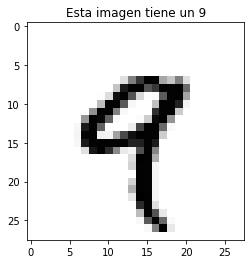

In [16]:
plt.imshow(X_train[4], cmap="Greys")
plt.title(f"Esta imagen tiene un {y_train[4]}")
plt.show()

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

```
library(keras)
mnist <- dataset_mnist()
x_train <- mnist$train$x
g_train <- mnist$train$y
x_test <- mnist$test$x
g_test <- mnist$test$y
dim(x_train)
dim(x_test)
```

In [20]:
x = keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(X_train[:, :, 1])
x = layers.Flatten()(x)
x = tf.constant(x)
x.numpy().min(), x.numpy().mean(), x.numpy().max()

(0.0, 6.408263e-05, 1.0)

In [21]:
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))

x = keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(rate=0.4)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(rate=0.3)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=20)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [22]:
df_history = pd.DataFrame(history.history)
df_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.357312,0.891933,0.130463,0.9604
1,0.168893,0.949100,0.100799,0.9677
2,0.131389,0.960567,0.087347,0.9731
3,0.112369,0.965683,0.085589,0.9741
4,0.095947,0.970517,0.074403,0.9775


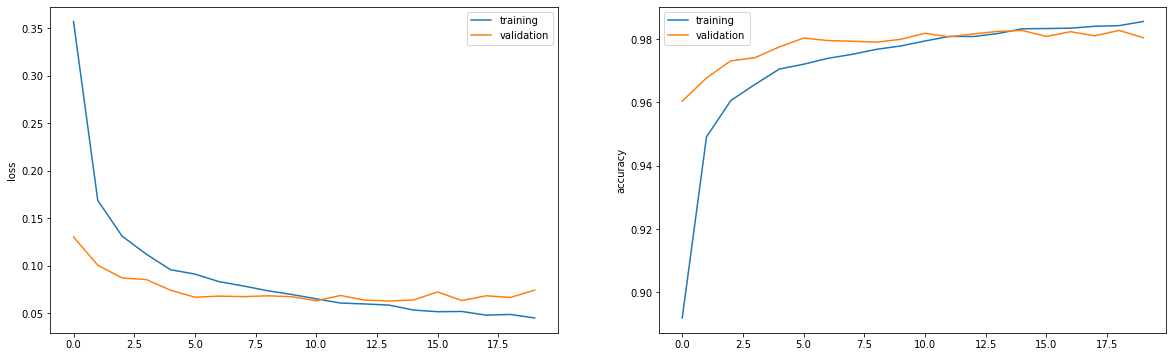

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_history.loss, label="training")
sns.lineplot(data=df_history.val_loss, label="validation")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_history.accuracy, label="training")
sns.lineplot(data=df_history.val_accuracy, label="validation")
plt.legend()
plt.show()

Hay $60.000$ imágenes en los datos de entrenamiento y $10.000$ en los datos de prueba.

Las imágenes son de $28×28$, y se almacenan como una matriz tridimensional, por lo que necesitamos
que darles forma de matriz. 

Además, tenemos que codificar la etiqueta de la clase de una sola vez.
etiqueta. 

Por suerte, Keras tiene un montón de funciones incorporadas que hacen esto por nosotros.

```R
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
y_train <- to_categorical(g_train, 10)
y_test <- to_categorical(g_test, 10)
```

Las redes neuronales son sensibles a la escala de las entradas. Por ejemplo, la regularización de *ridge* y de *lasso* se ve afectada por la escala. En este caso, las entradas son valores de escala de grises de ocho bits entre $0$ y $255$, por lo que reescalamos al intervalo de la unidad.


```R
x_train <- x_train / 255
x_test <- x_test / 255
```

Ajustamos la red neuronal:

```R
modelnn <- keras_model_sequential()

modelnn %>% layer_dense(units = 256, 
                        activation = "relu",
                        input_shape = c(784)) %>%
            layer_dropout(rate = 0.4) %>%
            layer_dense(units = 128, activation = "relu") %>%
            layer_dropout(rate = 0.3) %>%
            layer_dense(units = 10, activation = "softmax")
```

*Summary* del modelo:


In [24]:
summary(modelnn)

NameError: name 'summary' is not defined

Los parámetros de cada capa incluyen un término de sesgo, lo que da lugar a un
número de parámetros de $235146$. 

Por ejemplo, la primera capa oculta implica $(784 + 1) × 256 = 200.960$ parámetros.

Minimizamos la *cross-entropy*:

```R
modelnn %>% compile(loss = "categorical_crossentropy",
                    optimizer = optimizer_rmsprop(),
                    metrics = c("accuracy"))
```

Entrenamos el modelo:

```R
system.time(
  history <- modelnn %>% fit(x_train, y_train, 
                             epochs = 30, 
                             batch_size = 128,
                             validation_split = 0.2)
)
```

In [25]:
plot(history, smooth = FALSE)

NameError: name 'plot' is not defined

* El entrenamiento se realiza con el $80%$ de las $60000$ observaciones.
* El SGD utiliza lotes de $128$ observaciones para calcular el gradiente. Una época corresponde a 375 pasos.

Evaluamos nuestras predicciones:

In [26]:
def accuracy(pred, truth):
    return np.mean(pred == truth)

y_pred = model.predict(X_test)  # Esta es simplemente la capa de salida de la RN
y_pred = np.argmax(y_pred, axis=1)  # Aquí predecimos según el valor de máxima activación
accuracy(y_pred, y_test)

0.9804

¿Qué ejemplos están mal clasificados?

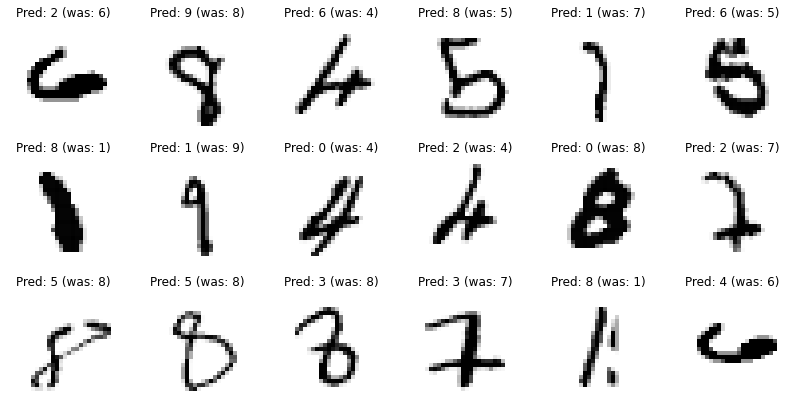

In [27]:
wrongs = np.where(y_pred != y_test)[0]  # Recupera los índices de las obsveraciones mal clasificadas
fig, axs = plt.subplots(3, 6, figsize=(14, 7))
for idx, ax in zip(  # `zip` aparea los elementos de
    np.random.choice(wrongs, 18, replace=False),  #  los índices de 18 dígitos mal clasificados
    fig.axes  # con los 3 * 6 = 18 "subplots" recién creados
):
    ax.imshow(X_test[idx], cmap="Greys")
    ax.set_title(f"Pred: {y_pred[idx]} (was: {y_test[idx]})")
    ax.axis("off")
plt.show()

```R
accuracy <- function(pred, truth)
mean(drop(pred) == drop(truth))

modelnn %>% predict_classes(x_test) %>% accuracy(g_test)
```

Para ajustar una regresión logística basta con omitir la capa oculta.

(`glmnet` es más lento para un dataset grande)

```R
modellr <- keras_model_sequential() % >%
  layer_dense(input_shape = 784, units = 10,
  activation = "softmax")
summary(modellr)
```

In [70]:
# Build a simple model
model = keras.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=X_train.shape[1:]))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn import preprocessing
binarizer = preprocessing.LabelBinarizer().fit(y_train)

In [29]:
binarizer

LabelBinarizer()

In [72]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    X_train,
    binarizer.transform(y_train),
    epochs = 100,
    batch_size = 128,
    validation_data = (X_test, binarizer.transform(y_test)),
    verbose=0,
    callbacks=[early_stopping_callback],
)

In [73]:
# y_pred = model.predict_classes(X_test)
# keras advierte que `Sequential.predict_classes` está por deprecarse y sugiere
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy(y_pred, y_test)

0.9279

In [77]:
df_history = pd.DataFrame(history.history)

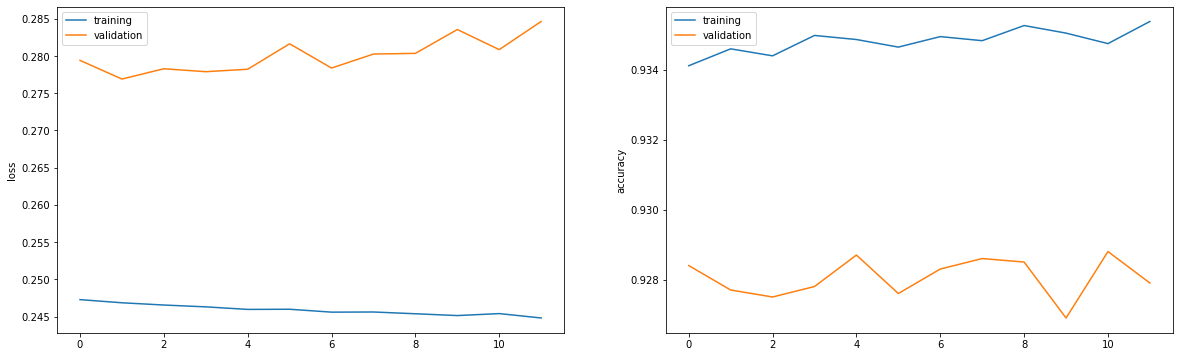

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_history.loss, label="training")
sns.lineplot(data=df_history.val_loss, label="validation")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_history.accuracy, label="training")
sns.lineplot(data=df_history.val_accuracy, label="validation")
plt.legend()
plt.show()

Ajustamos el modelo.

```R
modellr %>% compile(loss = "categorical_crossentropy",
                    optimizer = optimizer_rmsprop(), 
                    metrics = c("accuracy"))
modellr %>% fit(x_train, y_train, 
                epochs = 30,
                batch_size = 128, 
                validation_split = 0.2)
modellr %>% predict_classes(x_test) 
        %>% accuracy(g_test)
```

In [101]:
flat_X_train = np.reshape(X_train, (-1, 28 * 28)) / 255
flat_X_test = np.reshape(X_test, (-1, 28 * 28)) / 255

In [102]:
from sklearn.linear_model import LogisticRegression

In [118]:
mn_mod = LogisticRegression(multi_class="multinomial", max_iter=500)
mn_fit = mn_mod.fit(flat_X_train[:10000], y_train[:10000])

In [119]:
accuracy(mn_fit.predict(flat_X_test), y_test)

0.9051

# Ejercicio

Ajustar una red neuronal a los datos `Default`: 
* Utilice una sola capa oculta
con $10$ unidades, y regularización de *dropout*. 
* Compare el rendimiento de clasificación de su modelo con una regresión logística.

In [159]:
default = pd.read_csv("../data/default.csv")

In [160]:
for col in ["default", "student"]:  # codifico binariamente los dos vectores Yes/No
    default[col] = np.array(default[col] == "Yes", dtype=int)
y = default.default
X = default.drop(columns="default")

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X.shape

(10000, 3)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [172]:
model = keras.Sequential()
model.add(layers.Dense(units=10, activation="relu", input_shape=X.shape[1:]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                40        
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(
    X_train,
    y_train,
    epochs = 1000,
    batch_size = 128,
    validation_data = (X_test, y_test),
    verbose=2,
    callbacks=[early_stopping_callback],
)

Epoch 1/1000
16/16 - 0s - loss: 3658.7952 - accuracy: 0.1220 - val_loss: 3334.7600 - val_accuracy: 0.0336
Epoch 2/1000
16/16 - 0s - loss: 3091.6819 - accuracy: 0.1090 - val_loss: 2845.8789 - val_accuracy: 0.0336
Epoch 3/1000
16/16 - 0s - loss: 2689.4519 - accuracy: 0.1130 - val_loss: 2409.0828 - val_accuracy: 0.0336
Epoch 4/1000
16/16 - 0s - loss: 2218.2488 - accuracy: 0.1205 - val_loss: 2010.2958 - val_accuracy: 0.0338
Epoch 5/1000
16/16 - 0s - loss: 1908.4473 - accuracy: 0.2340 - val_loss: 1721.1102 - val_accuracy: 0.0338
Epoch 6/1000
16/16 - 0s - loss: 1612.6638 - accuracy: 0.3120 - val_loss: 1498.8341 - val_accuracy: 0.0338
Epoch 7/1000
16/16 - 0s - loss: 1413.7863 - accuracy: 0.3060 - val_loss: 1291.5354 - val_accuracy: 0.0338
Epoch 8/1000
16/16 - 0s - loss: 1233.2112 - accuracy: 0.3065 - val_loss: 1096.4121 - val_accuracy: 0.0339
Epoch 9/1000
16/16 - 0s - loss: 1010.2798 - accuracy: 0.3285 - val_loss: 921.7149 - val_accuracy: 0.0339
Epoch 10/1000
16/16 - 0s - loss: 877.4775 - acc

In [183]:
df_history = pd.DataFrame(history.history)

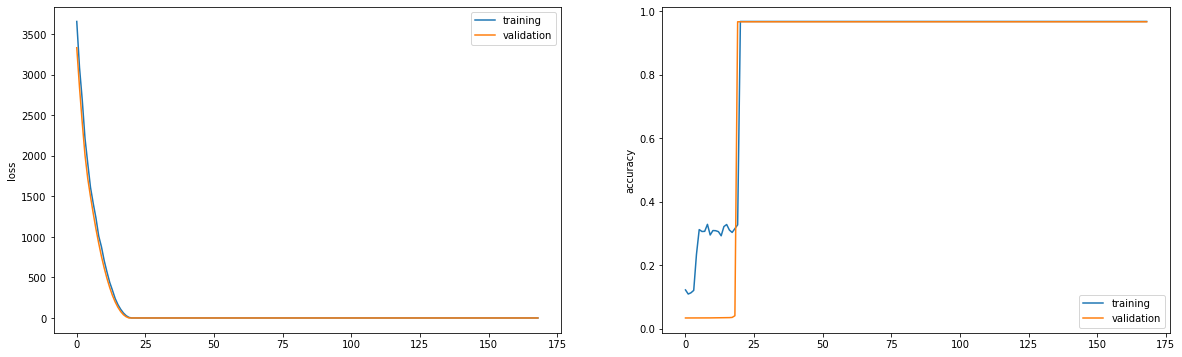

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_history.loss, label="training")
sns.lineplot(data=df_history.val_loss, label="validation")
plt.subplot(1, 2, 2)
sns.lineplot(data=df_history.accuracy, label="training")
sns.lineplot(data=df_history.val_accuracy, label="validation")
plt.legend()
plt.show()

In [193]:
y_pred = np.array(model.predict(X_test).reshape(-1) > 0.5, dtype="int")

In [194]:
accuracy(y_test, y_pred)

0.9665

In [196]:
lr_mod = LogisticRegression()
lr_fit = lr_mod.fit(X_train, y_train)
y_pred = lr_fit.predict(X_test)
accuracy(y_test, y_pred)

0.965375

In [202]:
lr_fit.coef_

array([[-2.29715667e-06,  5.48188218e-04, -1.32997374e-04]])